In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
enddate=date.datetime(2022,4,3)
startdate=date.datetime(2020,1,1)
tick='^MXX'
ipc= pdr.get_data_yahoo(tick,start=startdate,end=enddate)

In [3]:
ipc.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-28,55779.730469,55335.859375,55436.449219,55685.140625,122106400,55685.140625
2022-03-29,56276.390625,55517.320312,55590.468750,56111.210938,244298600,56111.210938
2022-03-30,56174.558594,55526.968750,56129.468750,55814.988281,214854100,55814.988281
2022-03-31,56730.531250,55811.398438,55811.398438,56536.679688,226310800,56536.679688
2022-04-01,57064.160156,56274.781250,56530.558594,56609.539062,184368800,56609.539062


<AxesSubplot:xlabel='Date'>

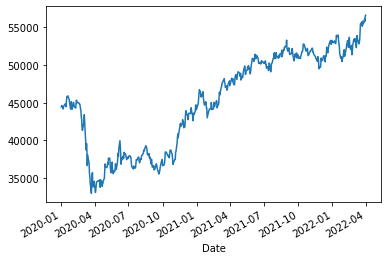

In [5]:
%matplotlib inline
ipc.Close.plot()

In [15]:
def MA(df, n):
    MA=pd.Series(pd.Series.rolling(df['Close'],n).mean(),name='MA_'+str(n))
    df=df.join(MA)
    return df

In [16]:
ma_50=MA(ipc,50)
ma_200=MA(ma_50,200)

In [17]:
ma_200.head()

,High,Low,Open,Close,Volume,Adj Close,MA_50,MA_200
Date,,,,,,,,
2020-01-02,44521.519531,43716.488281,43739.519531,44437.230469,95180400,44437.230469,NaN,NaN
2020-01-03,44742.980469,44177.910156,44355.210938,44624.851562,103484500,44624.851562,NaN,NaN
2020-01-06,44571.738281,44287.128906,44489.968750,44495.300781,86928400,44495.300781,NaN,NaN
2020-01-07,44588.269531,44018.058594,44522.359375,44157.808594,137546300,44157.808594,NaN,NaN
2020-01-08,44515.988281,44078.410156,44160.550781,44470.910156,144629400,44470.910156,NaN,NaN


In [18]:
df=ma_200[['Close','MA_50','MA_200']]

<AxesSubplot:xlabel='Date'>

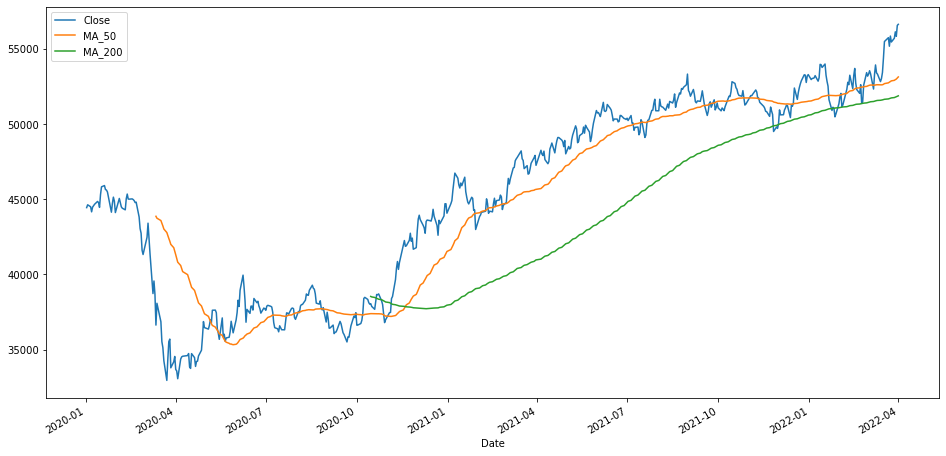

In [19]:
df.plot(figsize=(16,8))